In [42]:
import numpy as np
#import numpy這個套件，後續使用np呼叫numpy，其提供大量數學函式庫
import pandas as pd
#import pandas這個套件，後續使用pd呼叫pandas，是一個很好用的資料讀取套件
import csv
import random
import math
import operator
import random
data = pd.read_csv('./train.csv',)
#讀取資料夾檔案，上面為讀取程式所在資料夾的train.csv檔，如放在其他位置，可將其更改為相對或絕對路徑
data = data.rename(columns = {'花萼長度':'SepalLengthCm','花萼寬度':'SepalWidthCm',
                             '花瓣長度':'PetalLengthCm','花瓣寬度':'PetalWidthCm','屬種':'Species'})
#更改資料各column裡面的文字
data.head()
#查看前面幾筆資料
#若需要看全部資料，只需將其更改為：data

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [43]:
data.shape
#看資料有多少行多少列

(123, 7)

In [44]:
data["type"].value_counts()
#查看type那一column有多少個不同的值，各有多少個

3    40
2    40
1    40
4     3
Name: type, dtype: int64

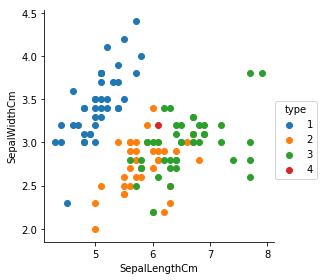

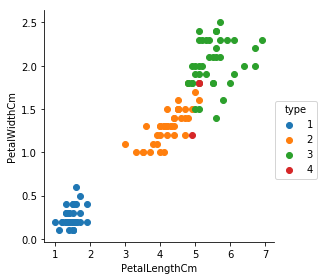

In [45]:
# 查看指定資料“SepalLengthCm & SepalWidthCm , PetalLengthCm & PetalwitdthCm” 分布狀況
import seaborn as sns
#若系統沒有該套件，pip install seaborn可安裝該套件
import matplotlib.pyplot as plt
#畫圖工具
sns.FacetGrid(data, hue="type", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
sns.FacetGrid(data, hue="type", size=4).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend();
plt.show();
#觀察後，發現根據Sepal去分類的話，會有很多overlapping在一起
#而根據Petal去分類的話，能夠比較好的區分各類，overlap的地方比較少

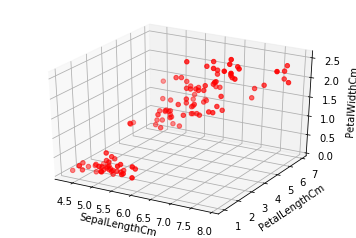

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

x=data["SepalLengthCm"]
y=data["PetalLengthCm"]
z=data["PetalWidthCm"]

#color=("Iris-setosa", "Iris-virginica", "Iris-versicolor")
#color=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
ax.scatter(x,y,z,c='r',marker='o');

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

plt.show()

In [47]:
data_pairplot = data.drop(['Species','id'],axis=1)
data_pairplot.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,type
0,5.4,3.7,1.5,0.2,1
1,4.8,3.4,1.6,0.2,1
2,4.8,3.0,1.4,0.1,1
3,4.3,3.0,1.1,0.1,1
4,5.8,4.0,1.2,0.2,1


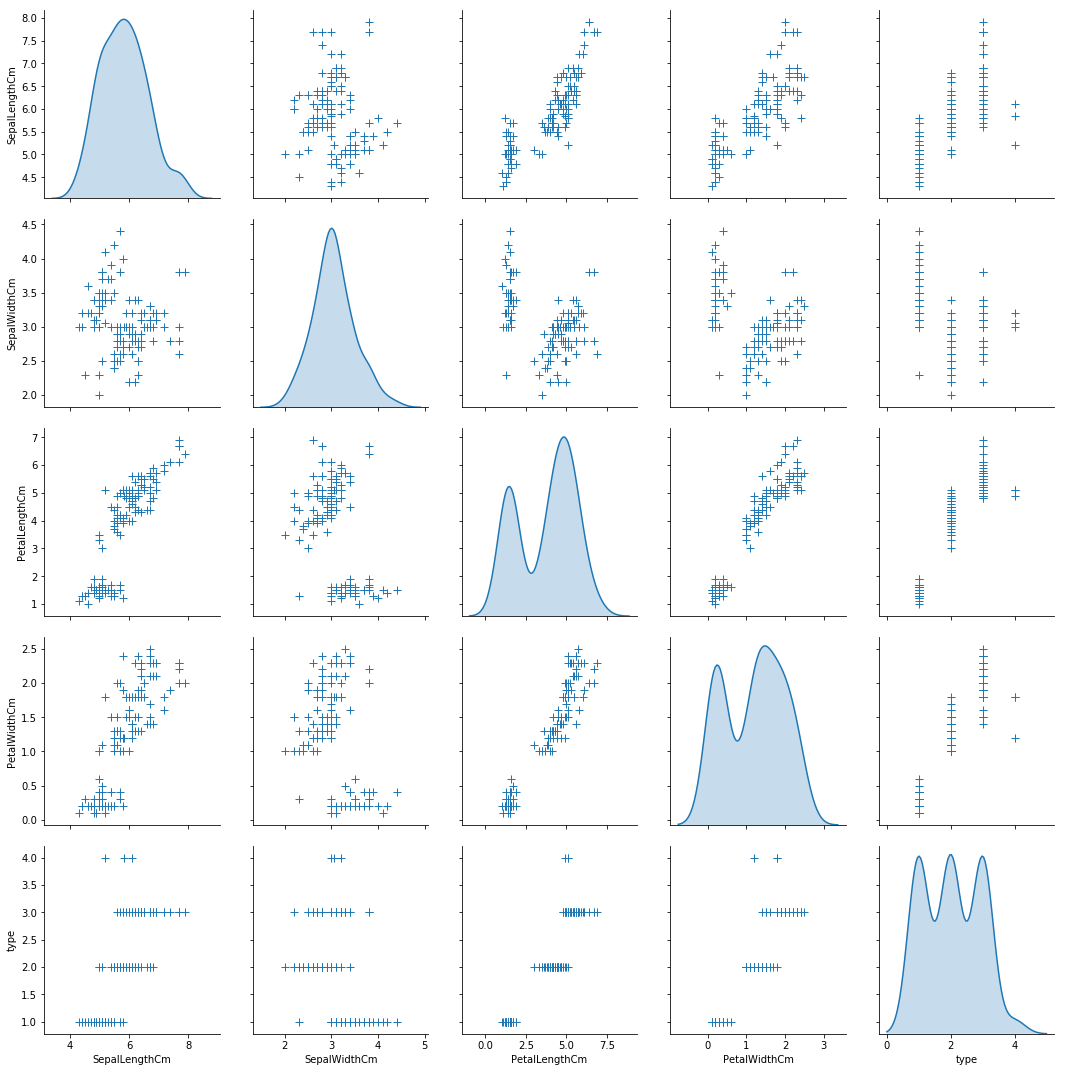

In [48]:
#將有缺值的地方，利用各特徵值之平均數，藉由 fillna 方法填補空值
data_pairplot['SepalLengthCm'] = data_pairplot['SepalLengthCm'].fillna(data_pairplot['SepalLengthCm'].mean())
data_pairplot['SepalWidthCm'] = data_pairplot['SepalWidthCm'].fillna(data_pairplot['SepalWidthCm'].mean())

data_pairplot.isnull().sum()
#如果不進行以上處理，train.csv裡面有缺值，在有缺值的情況下，無法使用下面的指令

#kde為改變對角圖
sns.pairplot(data_pairplot,  size=3, diag_kind="kde",markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True));
plt.show()

#下面是一個簡單的例子，直接load iris這個dataset,可以直接畫圖
#關於指令的參數，可以詳見其官網： https://seaborn.pydata.org/generated/seaborn.pairplot.html
#iris = sns.load_dataset("iris")
#sns.pairplot(iris,diag_kind="kde");
#plt.show()



In [49]:
data.describe()
#進行資料的一些計算，包含平均值，標準差，最小，最大值...

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,type
count,123.000000,122.000000,122.000000,123.000000,123.000000,123.000000
mean,62.000000,5.840164,3.058197,3.764228,1.204878,2.048780
std,35.651087,0.790926,0.445332,1.731536,0.754425,0.867006
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,31.500000,5.200000,2.800000,1.600000,0.300000,1.000000
50%,62.000000,5.800000,3.000000,4.300000,1.300000,2.000000
75%,92.500000,6.375000,3.300000,5.100000,1.800000,3.000000
max,123.000000,7.900000,4.400000,6.900000,2.500000,4.000000


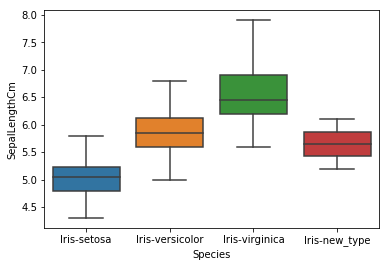

In [50]:
#Species及SepalLengthCm的對應關係
sns.boxplot(x='Species',y='SepalLengthCm', data=data)
plt.show()

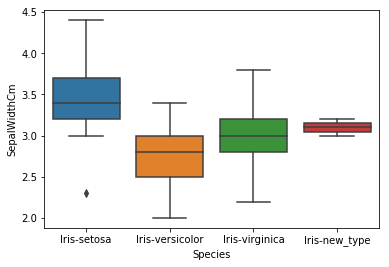

In [51]:
#Species及SepalWidthCm的對應關係
sns.boxplot(x='Species',y='SepalWidthCm', data=data)
plt.show()

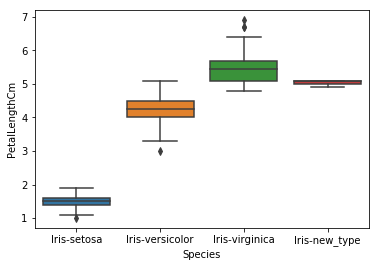

In [52]:
#Species及PetalLengthCm的對應關係
sns.boxplot(x='Species',y='PetalLengthCm', data=data)
plt.show()

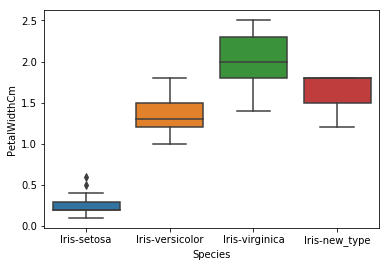

In [53]:
#Species及PetalWidthCm的對應關係
sns.boxplot(x='Species',y='PetalWidthCm', data=data)
plt.show()

In [54]:
data.corr()
#計算兩column的相關性

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,type
id,1.000000,0.694035,-0.391710,0.879807,0.887936,0.944051
SepalLengthCm,0.694035,1.000000,-0.132300,0.861842,0.813901,0.750904
SepalWidthCm,-0.391710,-0.132300,1.000000,-0.437289,-0.368907,-0.399240
PetalLengthCm,0.879807,0.861842,-0.437289,1.000000,0.958595,0.921715
PetalWidthCm,0.887936,0.813901,-0.368907,0.958595,1.000000,0.918191
type,0.944051,0.750904,-0.399240,0.921715,0.918191,1.000000


In [55]:
# 將不需要的特徵值利用drop刪除，下例刪除了id,Species,跟type
X = data.drop(['id','Species','type'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.4,3.7,1.5,0.2
1,4.8,3.4,1.6,0.2
2,4.8,3.0,1.4,0.1
3,4.3,3.0,1.1,0.1
4,5.8,4.0,1.2,0.2


In [56]:
# 利用pandas裡的 isnull 加上 sum 
# 可以看出哪些特徵值有空值(缺值)
#如果資料有缺失，就要想辦法將其補足
X.isnull().sum()

SepalLengthCm    1
SepalWidthCm     1
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [57]:
# 將每筆資料的target放入y, print 出來如下 
y = data['type']
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: type, dtype: int64

In [58]:
#將有缺值的地方，利用各特徵值之平均數，藉由 fillna 方法填補空值
X['SepalLengthCm'] = X['SepalLengthCm'].fillna(X['SepalLengthCm'].mean())
X['SepalWidthCm'] = X['SepalWidthCm'].fillna(X['SepalWidthCm'].mean())

X.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

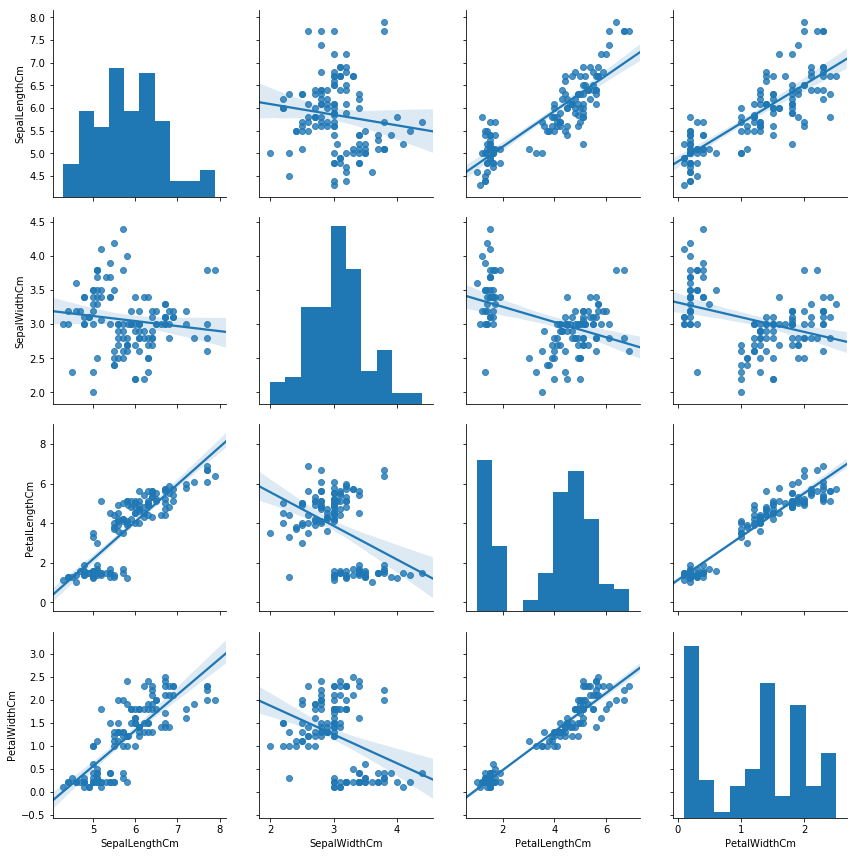

In [59]:
sns.pairplot(X,  size=3, kind="reg");
plt.show()
#回歸圖

In [60]:
# 利用 train_test_split 方法將資料切分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training,一般來說，testing資料會比較少

In [61]:
# 採用xgbc建模方式進行預測
import xgboost as xgb
#xgboost在Windows環境 python3.5 的情況下，可以使用資料夾裡的xgboost-0.72-cp35-cp35m-win_amd64.whl去安裝
#pip install xgboost-0.72-cp35-cp35m-win_amd64.whl
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [62]:
# 測試xgbc的分數
xgbc.score(X_test, y_test)

D:\Program Files\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.918918918918919

In [63]:
# 將test資料載入
test_data = pd.read_csv('./test.csv')
test_data = test_data.rename(columns = {'花萼長度':'SepalLengthCm','花萼寬度':'SepalWidthCm',
                             '花瓣長度':'PetalLengthCm','花瓣寬度':'PetalWidthCm'})
test_data.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [64]:
# 確認 test 資料沒有空(缺)值
test_data.isnull().sum()

id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [65]:
# 將 id 欄位刪除(非我們所需特徵值)
test_feature = test_data.drop('id',axis=1)

In [66]:
# 利用 xgbc.predict 進行 test 檔案預測，並將預測結果存至 predict
predict = xgbc.predict(test_feature)

D:\Program Files\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [67]:
# 創建儲存上傳csv檔之Dataframe
# 利用字典將test欄位"id"與'predict'(預測值) 儲存至Dataframe
data = {'id':test_data['id'],'type':predict}

predicted_dataframe = pd.DataFrame(data=data)

In [68]:
predicted_dataframe.head()

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [69]:
# 將Dataframe存成csv檔案格式
predicted_dataframe.to_csv('./submission.csv', index=False)